In [ ]:
# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [ ]:
# Downloading and Prepping Data

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# Download the dataset and read it into a pandas dataframe.
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# Look into the data 
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [76]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [5]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
# Looking good!! Ready to plot graphs 

In [9]:
# Visualizing data with matplotlib

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [10]:
# 1. Pie Charts


In [11]:
# Pie Charts 
# A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

# Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

# Step 1: Gather data.
#We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

#1. Split: Splitting the data into groups based on some criteria.
#2. Apply: Applying a function to each group independently:
#.sum()
#.count()
#.mean() 
#.std() 
#.aggregate()
#.apply()
#.etc..
#3.  Combine: Combining the results into a data structure.

In [12]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [13]:
# Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

#autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
#startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
# shadow - Draws a shadow beneath the pie (to give a 3D feel).

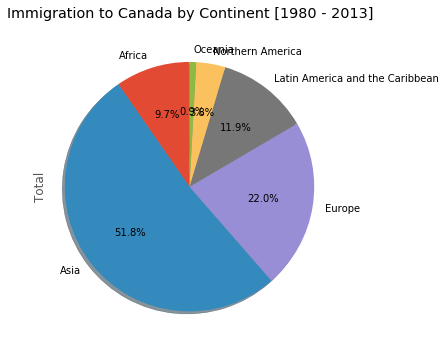

In [14]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [15]:
# The above visual is not very clear, the numbers and text overlap in some instances.
# Let's make a few modifications to improve the visuals:

# Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
# Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
# Pass in a custom set of colors for continents by passing in colors parameter.
# Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

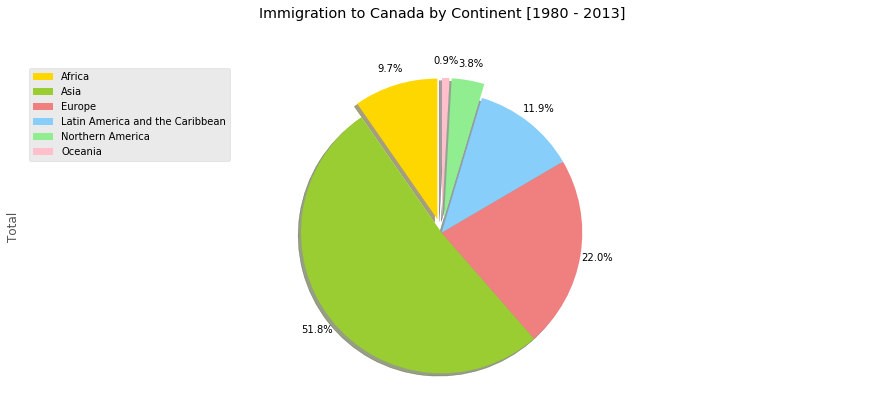

In [16]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [17]:
# Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

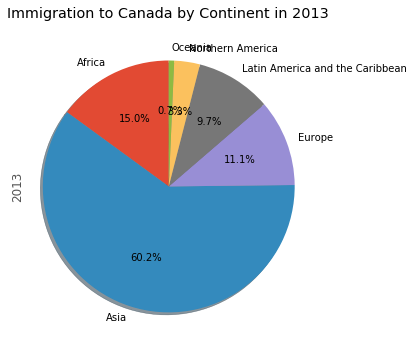

In [18]:
df_continents['2013'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent in 2013')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

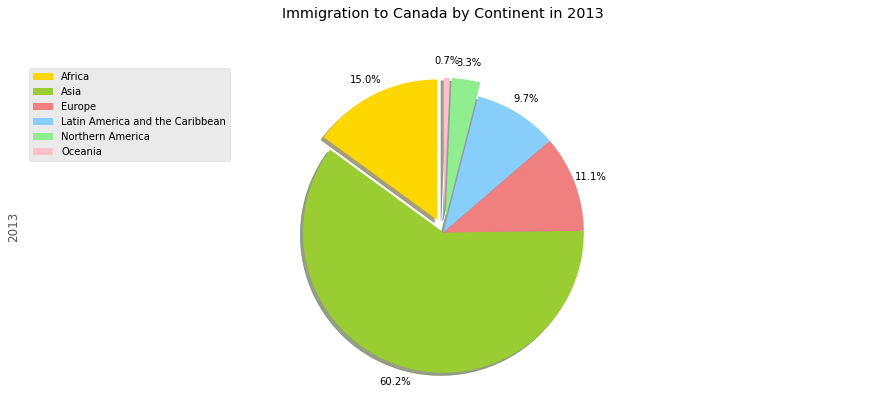

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [20]:
# 2. Box plot

In [21]:
# A box plot is a way of statistically representing the distribution of the data through five main dimensions:

# Minimun: Smallest number in the dataset.
# First quartile: Middle number between the minimum and the median.
# Second quartile (Median): Middle number of the (sorted) dataset.
# Third quartile: Middle number between median and maximum.
# Maximum: Highest number in the dataset.

In [22]:
# To make a box plot, we can use kind=box in plot method invoked on a pandas series or dataframe.

# Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

# Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe.
 #    This will help us with calling the dataframe.describe() method to view the percentiles.

In [23]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


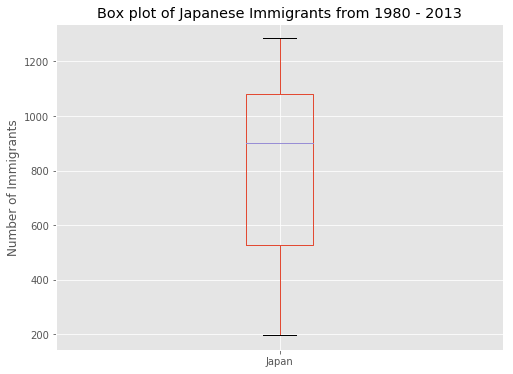

In [24]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [25]:
# We can immediately make a few key observations from the plot above:

# The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
# 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
# 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).
# We can view the actual numbers by calling the describe() method on the dataframe.

In [26]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [27]:
# Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [28]:
# Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [67]:
df_CI=df_can.loc[["China","India"], years].transpose() # Change country name to columns and years to index(rows)
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


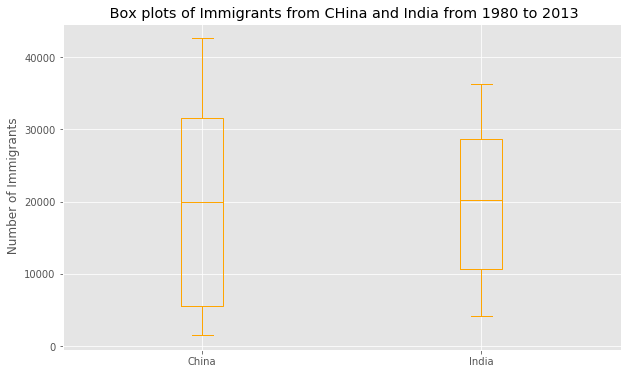

In [68]:
# Step 2 plot the box plot for df_CI using plot(kind= " box")


df_CI.plot(kind='box', figsize=(10,6), color='orange' )

plt.title(" Box plots of Immigrants from CHina and India from 1980 to 2013")
plt.ylabel(" Number of Immigrants")

plt.show( )

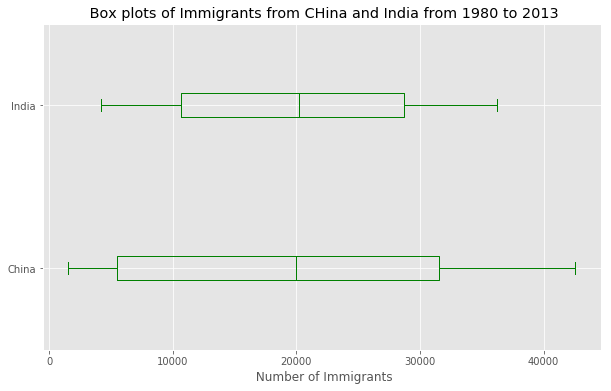

In [69]:
# Horizontal Box plot
df_CI.plot(kind='box', figsize=(10,6), color='green', vert=False ) # add a parameter vert=False to make it horizontal 

plt.title(" Box plots of Immigrants from CHina and India from 1980 to 2013")
plt.xlabel(" Number of Immigrants")

plt.show( )

In [70]:
# Subplots

# Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

# To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

# Typical syntax is :

 #   fig = plt.figure() # create figure
 #    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
# Where

# nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
# plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.

    

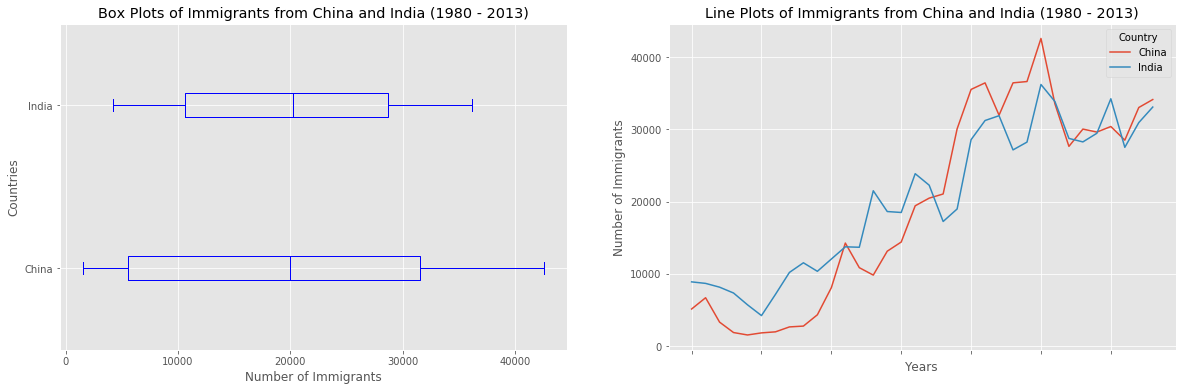

In [33]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [34]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

# Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [35]:
# # We will sort on this column to get our top 5 countries using pandas sort_values() method.
# inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(['Total'],ascending=False, axis=0, inplace=True)
df_top15=df_can.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [36]:
# Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

# 1.Create a list of all years in decades 80's, 90's, and 00's.
# 2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# 3. Merge the three series into a new data frame. Call your dataframe new_df.


In [37]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 



 # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)



# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 



# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [38]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


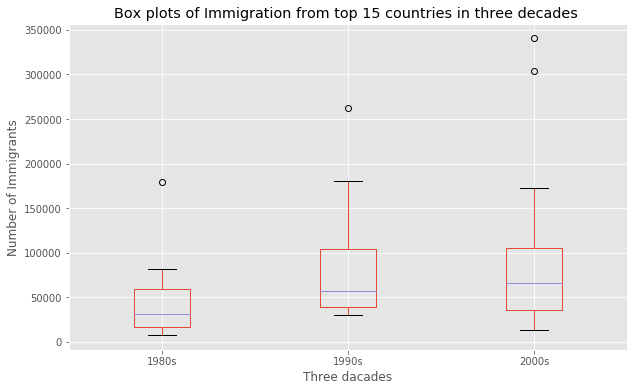

In [39]:
# Plot the boc plots
new_df.plot(kind='box',figsize=(10,6))

plt.title("Box plots of Immigration from top 15 countries in three decades ")
plt.xlabel("Three dacades")
plt.ylabel("Number of Immigrants")
plt.show()

In [40]:
# Compare the box plots statiscally with .describe()

In [41]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [42]:
# A scatter plot (2D) is a useful method of comparing variables against each other. 
# Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph.
# While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. 
# The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, 
# we can mathematically calculate this relationship and use it to predict trends outside the dataset.
# Let's start by exploring the following:
# Question: Using a scatter plot, let's visualize the trend of total immigration to Canada (all countries combined)
# for the years 1980 - 2013.


In [43]:
# Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [44]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [45]:
# Step 2: Plot the data. In Matplotlib, we can create a scatter plot set by passing in kind='scatter'
# as plot argument. We will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.

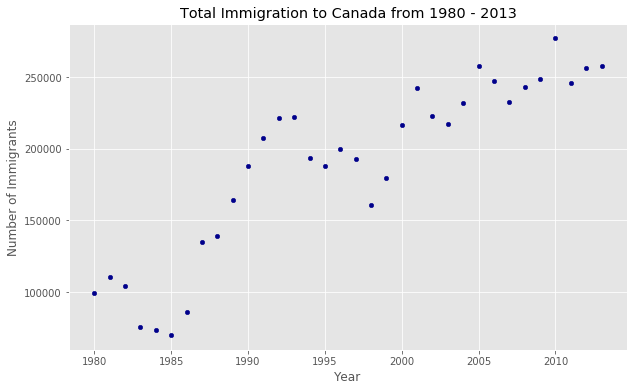

In [46]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [47]:
# We can mathematically analyze this upward trend using a regression line (line of best fit).

# So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

# Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

# x: x-coordinates of the data.
# y: y-coordinates of the data.
# deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [48]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

In [49]:
# The output is an array with the polynomial coefficients, highest powers first.
# Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] 
# with the the slope in position 0 and intercept in position 1.

# Step 2: Plot the regression line on the scatter plot.

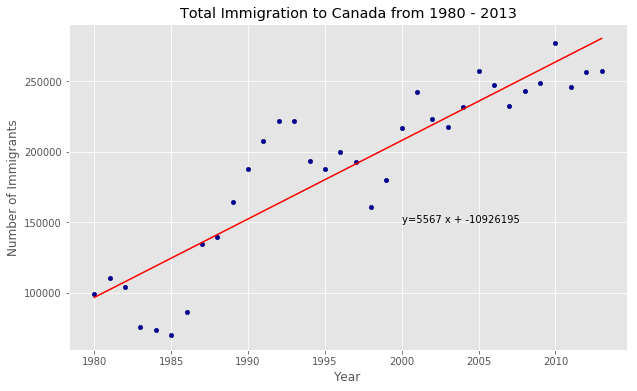

'No. Immigrants = 5567 * Year + -10926195'

In [50]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [51]:
# Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

# No. Immigrants = 5567 * Year - 10926195
# No. Immigrants = 5567 * 2015 - 10926195
# No. Immigrants = 291,310

In [52]:
# Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [53]:

# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))



# reset index in place
df_total.reset_index(inplace=True)



 # rename columns
df_total.columns = ['year', 'total']
 # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
 # show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


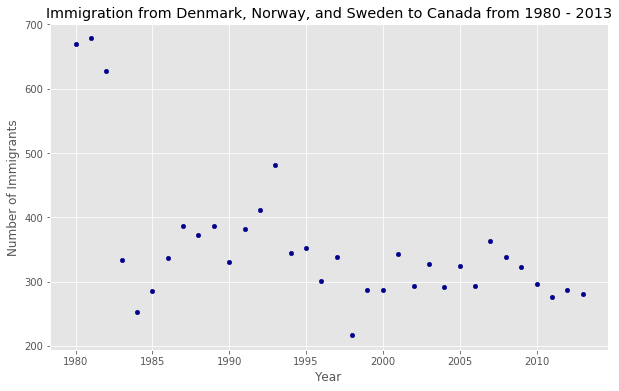

In [54]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

In [55]:
# Question: subplots of box plots and scatter plots of the above three countries


In [79]:
# Get datafram from 'Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013'
df_DNS=df_can.loc[["Denmark","Norway","Sweden"],years].transpose()  # No space in"" before or after words or it is null
# reset index in place
df_DNS.reset_index(inplace=True)
df_DNS.head()

Country,index,Denmark,Norway,Sweden
0,1980,272,116,281
1,1981,293,77,308
2,1982,299,106,222
3,1983,106,51,176
4,1984,93,31,128


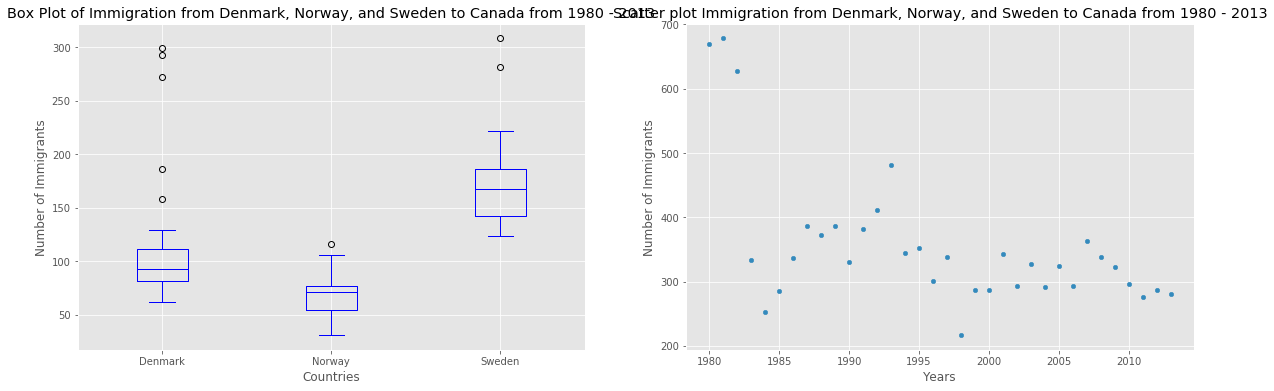

In [80]:
fig = plt.figure() # create figure

ax2 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax3 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_DNS.plot(kind='box', color='blue',  figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('Box Plot of Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
ax2.set_xlabel('Countries')
ax2.set_ylabel('Number of Immigrants')

# Subplot 2: Line plot
df_total.plot(kind='scatter', x="year", y="total", figsize=(20, 6), ax=ax3) # add to subplot 2
ax3.set_title ('Scatter plot Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
ax3.set_ylabel('Number of Immigrants')
ax3.set_xlabel('Years')

plt.show()

In [ ]:
# Bubble Plots 

In [ ]:
# Q:Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil.
# Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. 
# We will set the weights for the bubble as the normalized value of the population for each year.
# Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and bring it in the dataframe.


In [82]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [83]:
# Normalize data 
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [ ]:
# Step 3: Plot the data.

# To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
# We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
# multiply weights by 2000 to scale it up on the graph, and,
# add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

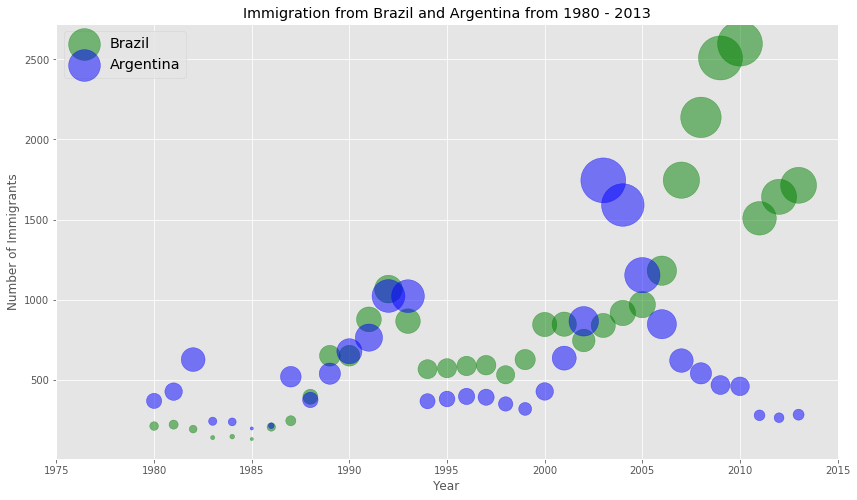

In [84]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [ ]:
# Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

# Step 1: Normalize the data pertaining to China and India.

In [99]:

# normalize China data
norm_China = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_India = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

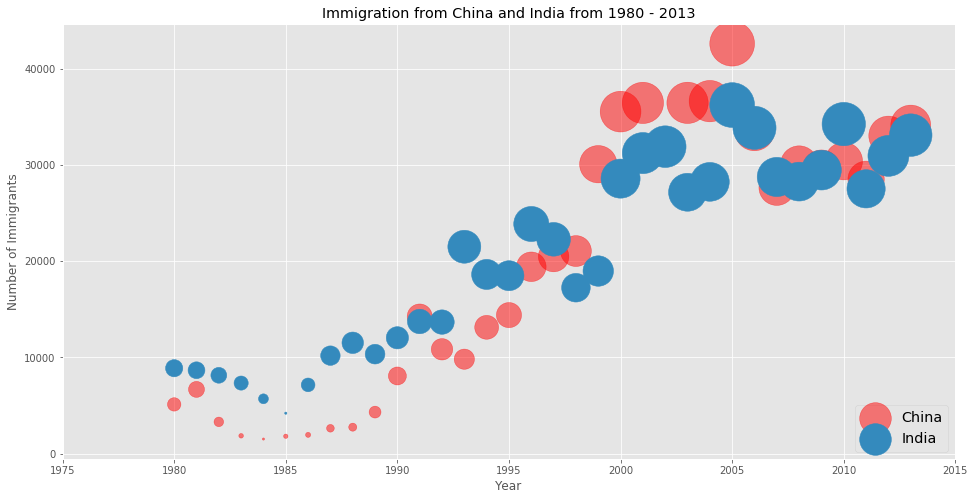

In [115]:
# China
ax2=df_can_t.plot(kind ='scatter',
                  x="Year",
                  y="China",
                  figsize=(16,8),
                  alpha= 0.5,  # Transparancy 
                  color= "red", # Defalt color is blue
                  s=norm_China * 2000 + 5,  # pass in weights 
                  xlim=(1975, 2015)
                 
                   )

# India
ax3 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(16,8),
                    #alpha= 0.5, # defalt 100% 
                    #color= "blue", # default color is blue
                    s=norm_India * 2000 + 5,
                    ax = ax2 # Very imoprtant to place it in with the other as or it won't show
                   )

ax2.set_ylabel('Number of Immigrants')   # Could change to ax3 to set label, title and lggend
ax2.set_title('Immigration from China and India from 1980 - 2013')
ax2.legend(['China', 'India'], loc='lower right', fontsize='x-large') # Loc=location " upper left", "center", "lower right"
                    
                 
